In [4]:
import matplotlib.pyplot as plt
import numpy as np
import math


def direct_estimator():
    c_list = [i / 100 for i in range(14, 3, -1)]
    max_attemps = 1000000
    relative_error_percent = 5
    x_axis = []
    y_axis = []
    for c in c_list:
        calculated_p_c = 0.5 * (1 - math.erf(1 / math.sqrt(2 * c)))
        # Lets take relative error 5%
        low_limit = (1 - relative_error_percent / 100) * calculated_p_c
        high_limit = (1 + relative_error_percent / 100) * calculated_p_c
        greater_than_1 = 0
        for m in range(1, max_attemps):
            experimental_p_c = greater_than_1 / m
            if low_limit <= experimental_p_c <= high_limit:
                break
            w = 0
            for n in range(1, 500):
                xi = np.random.normal(0, 1)
                z = (n - 0.5) * np.pi
                w += xi * np.sin(z * c) / z
            w *= math.sqrt(2)
            if w > 1:
                greater_than_1 += 1
        if m < max_attemps - 1:
            print(f'It took {m} attempts for {c} to reach the relative error of 5%')
            x_axis.insert(0, c)
            y_axis.insert(0, m)
        else:
            print(f'For {c} no successful events happened in {max_attemps} attempts')
            break
    plt.plot(x_axis, y_axis)  
    plt.title('Number of attempts to reach 5% relative error')
    plt.xlabel('c')
    plt.ylabel('Number of attempts')
    plt.show()
                
            

It took 507 attempts for 0.14 to reach the relative error of 5%
It took 687 attempts for 0.13 to reach the relative error of 5%
It took 490 attempts for 0.12 to reach the relative error of 5%
It took 1497 attempts for 0.11 to reach the relative error of 5%
It took 15719 attempts for 0.1 to reach the relative error of 5%
It took 2220 attempts for 0.09 to reach the relative error of 5%
It took 32764 attempts for 0.08 to reach the relative error of 5%
It took 48513 attempts for 0.07 to reach the relative error of 5%
It took 235140 attempts for 0.06 to reach the relative error of 5%
For 0.05 no successful events happened in 1000000 attempts


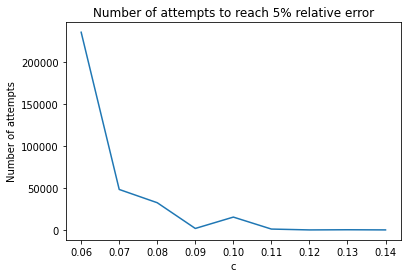

In [6]:
direct_estimator()

In [3]:
# We see that the number of required attempts grows exponentially as c becomes smaller. 
# For c=0.04 we couldn't even estimate the probability, as we didn't have a single successful event in 1000000 attempts
# That makes sense sinse the probability for c=0.04 is 0.5*(1-erf(1/sqrt(2*c))) = 2.87*10^(-7)

In [15]:
# We use the exponential distribution lambda * e^(-lambda*(x-1)), i.e. regular exponential which is moved 1 to the right. 
# We select lambda 1 / sqrt(2*pi*c) so that at x = 1 both exponential and original distributions 
# will have the same value. To implement the (x - 1) part, we use the regular exponential distribution
# from np.random, and then add 1 to the calculated sample. Note, since our sample is >= 1, the random variable is always 1

def original_density(c,x):
    return 1 / math.sqrt(2*np.pi*c) * np.e ** (-x**2 / (2*c))

def importance_sampling_using_exponential():
    c_list = [i / 100 for i in range(14, 1, -1)]
    max_attemps = 1000000
    x_axis = []
    y_axis = []
    for c in c_list:
        def exponential_distribution(x):
            rate = 1 / scale
            return rate * np.e ** (-rate * x)
        scale = math.sqrt(2*np.pi*c)
        calculated_p_c = 0.5 * (1 - math.erf(1 / math.sqrt(2 * c)))
        # Lets take relative error 5%
        low_limit = 0.95 * calculated_p_c
        high_limit = 1.05 * calculated_p_c
        greater_than_1 = 0
        experimental_p_c = 0
        for m in range(1, max_attemps):
            sample = np.random.exponential(scale)
            experimental_p_c += original_density(c, sample + 1) / exponential_distribution(sample)
            if low_limit <= experimental_p_c / m <= high_limit:
                experimental_p_c /= m
                break
        if m < max_attemps - 1:
            print(f'It took {m} attempts for {c} to reach the relative error of 5%')
            x_axis.insert(0, c)
            y_axis.insert(0, m)

        else:
            print(f'For {c} no successful events happened in {max_attemps} attempts')
    plt.plot(x_axis, y_axis)  
    plt.title('Number of attempts to reach 5% relative error')
    plt.xlabel('c')
    plt.ylabel('Number of attempts')
    plt.show()
           

It took 101 attempts for 0.14 to reach the relative error of 5%
It took 258 attempts for 0.13 to reach the relative error of 5%
It took 2 attempts for 0.12 to reach the relative error of 5%
It took 10 attempts for 0.11 to reach the relative error of 5%
It took 22 attempts for 0.1 to reach the relative error of 5%
It took 40 attempts for 0.09 to reach the relative error of 5%
It took 8 attempts for 0.08 to reach the relative error of 5%
It took 132 attempts for 0.07 to reach the relative error of 5%
It took 14 attempts for 0.06 to reach the relative error of 5%
It took 18 attempts for 0.05 to reach the relative error of 5%
It took 32 attempts for 0.04 to reach the relative error of 5%
It took 116 attempts for 0.03 to reach the relative error of 5%
It took 42 attempts for 0.02 to reach the relative error of 5%


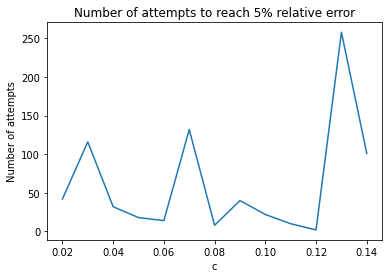

In [17]:
importance_sampling_using_exponential()

In [ ]:
# Using importance sampling, we reduced the number of attempts several orders of magnitude. 
# We were also able to estimate the probability for the really small c